<a href="https://colab.research.google.com/github/AbdullahMhr/AbdullahMhr/blob/main/Big_Data_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Sales Prediction**

# objectives

1. import relevent libraries
2. import dataset as csv
3. Define Target Variable (y) and Feature Variables (X)
4. Train Test Split
5. Model Evaluation / select a model
6. train the model
78. Prediction
. find the accuracy

## Data Source :
From YBIfoundation github page



# **Import Libraries**

In [136]:
import pandas as pd
import numpy as np

## Import Data

In [137]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Big%20Sales%20Data.csv')

In [138]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


## Describe Data

In [139]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [140]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [142]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
12531,FDJ58,15.6,Regular,0.105892,Snack Foods,172.6764,OUT017,2007,Medium,Tier 2,Supermarket Type1,2920.198800
5144,FDE28,9.5,Regular,0.132816,Frozen Foods,228.3668,OUT045,2002,Small,Tier 2,Supermarket Type1,2299.653676
1137,FDS35,9.3,Low Fat,0.111446,Breads,64.6826,OUT045,2002,Small,Tier 2,Supermarket Type1,1097.904200
10434,FDK27,NaN,Low Fat,0.008903,Meat,120.9756,OUT027,1985,Medium,Tier 3,Supermarket Type3,2787.038800
10639,FDO39,NaN,Regular,0.136702,Meat,182.1608,OUT027,1985,Medium,Tier 3,Supermarket Type3,5880.345600


## Data Preprocessing

In [143]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace = True)

<ipython-input-143-8c7acbdc8c63>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'), inplace = True)


In [144]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.300,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.300,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.300,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.300,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.800,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000
5,FDT36,12.300,Low Fat,0.111275,Baking Goods,35.0874,OUT046,1997,Small,Tier 1,Supermarket Type1,458.736200
6,FDQ36,7.855,Regular,0.161413,Baking Goods,35.2848,OUT013,1987,High,Tier 3,Supermarket Type1,299.335072
7,FDT36,7.855,Low Fat,0.110736,Baking Goods,35.2874,OUT027,1985,Medium,Tier 3,Supermarket Type3,988.047200
8,FDQ36,7.855,Regular,0.161875,Baking Goods,35.6848,OUT045,2002,Small,Tier 2,Supermarket Type1,335.563200
9,FDT36,12.300,Low Fat,0.111500,Baking Goods,35.6874,OUT045,2002,Small,Tier 2,Supermarket Type1,846.897600


In [145]:
df['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDT36,10
FDG09,10
FDZ56,10
FDT19,10
FDD56,10
...,...
NCW54,7
FDS22,7
FDM50,7


In [146]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,8485
Regular,4824
LF,522
reg,195
low fat,178


In [147]:
df.replace({'Item_Fat_Content' : { 'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}}, inplace = True)

In [148]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
13803,DRF36,16.100,Low Fat,0.023625,Soft Drinks,189.3846,OUT045,2002,Small,Tier 2,Supermarket Type1,3630.607400
7129,FDY56,16.350,Regular,0.062666,Fruits and Vegetables,225.6062,OUT018,2009,Medium,Tier 3,Supermarket Type2,1579.943400
13636,DRB24,8.785,Low Fat,0.020560,Soft Drinks,155.5656,OUT013,1987,High,Tier 3,Supermarket Type1,1489.641738
9326,NCP06,20.700,Low Fat,0.039213,Household,150.7366,OUT013,1987,High,Tier 3,Supermarket Type1,3401.069906
5164,FDL28,10.000,Regular,0.063273,Frozen Foods,230.9668,OUT049,1999,Medium,Tier 1,Supermarket Type1,2494.441440


In [149]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,9185
Regular,5019


In [150]:
df.replace({'Item_Fat_Content' : {'Low Fat' : 0 , 'Regular' : 1}}, inplace = True)

<ipython-input-150-52f4dbbb9a22>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Item_Fat_Content' : {'Low Fat' : 0 , 'Regular' : 1}}, inplace = True)


In [151]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
0,9185
1,5019


In [152]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,2013
Snack Foods,1989
Household,1548
Frozen Foods,1426
Dairy,1136
Baking Goods,1086
Canned,1084
Health and Hygiene,858
Meat,736


In [153]:
df.replace({'Item_Type': { 'Fruits and Vegetables' : 0, 'Snack Foods' :0, 'Household' : 1, 'Frozen Foods' : 0, 'Dairy' : 0, 'Baking Goods' : 0, 'Canned' :0, 'Health and Hygiene' : 0, 'Meat' : 0, 'Soft Drinks' : 0, 'Breads' : 0, 'Hard Drinks' : 0,'Others' : 2,  'Starchy Foods' :0, 'Breakfast' : 0, 'Seafood' : 0,}}, inplace = True)

<ipython-input-153-709221835ea2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Item_Type': { 'Fruits and Vegetables' : 0, 'Snack Foods' :0, 'Household' : 1, 'Frozen Foods' : 0, 'Dairy' : 0, 'Baking Goods' : 0, 'Canned' :0, 'Health and Hygiene' : 0, 'Meat' : 0, 'Soft Drinks' : 0, 'Breads' : 0, 'Hard Drinks' : 0,'Others' : 2,  'Starchy Foods' :0, 'Breakfast' : 0, 'Seafood' : 0,}}, inplace = True)


In [154]:
df['Item_Type'].value_counts()

,count
Item_Type,
0,12376
1,1548
2,280


In [155]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [156]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,1559
OUT013,1553
OUT049,1550
OUT046,1550
OUT035,1550
OUT045,1548
OUT018,1546
OUT017,1543
OUT010,925


In [157]:
df.replace({'Outlet_Identifier': {'OUT027' : 0, 'OUT013' : 1, 'OUT049' :2, 'OUT046' : 3, 'OUT035' : 4, 'OUT045' :5, 'OUT018' : 6, 'OUT017' : 7, 'OUT010' : 8, 'OUT019' : 9  }}, inplace = True)

<ipython-input-157-e5af50848707>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Identifier': {'OUT027' : 0, 'OUT013' : 1, 'OUT049' :2, 'OUT046' : 3, 'OUT035' : 4, 'OUT045' :5, 'OUT018' : 6, 'OUT017' : 7, 'OUT010' : 8, 'OUT019' : 9  }}, inplace = True)


In [158]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
0,1559
1,1553
2,1550
3,1550
4,1550
5,1548
6,1546
7,1543
8,925


In [159]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,7122
Small,5529
High,1553


In [160]:
df.replace({'Outlet_Size' : {'Medium' : 1, 'Small' : 0, 'High' : 2}}, inplace = True)

<ipython-input-160-4375367a2f5f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Size' : {'Medium' : 1, 'Small' : 0, 'High' : 2}}, inplace = True)


In [161]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
1,7122
0,5529
2,1553


In [162]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,2,1999,1,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,Tier 2,Supermarket Type1,352.874000


In [163]:
df.replace({'Outlet_Location_Type' : {'Tier 1' : 0, 'Tier 2' : 1, 'Tier 3' : 2}}, inplace = True)

<ipython-input-163-f5fbda57409f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Location_Type' : {'Tier 1' : 0, 'Tier 2' : 1, 'Tier 3' : 2}}, inplace = True)


In [164]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,9294
Grocery Store,1805
Supermarket Type3,1559
Supermarket Type2,1546


In [165]:
df.replace({'Outlet_Type' : {'Supermarket Type1': 0, 'Grocery Store' : 1, 'Supermarket Type3' : 2, 'Supermarket Type2' : 3}}, inplace = True)

<ipython-input-165-f021d7b41d56>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Type' : {'Supermarket Type1': 0, 'Grocery Store' : 1, 'Supermarket Type3' : 2, 'Supermarket Type2' : 3}}, inplace = True)


In [166]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
0,9294
1,1805
2,1559
3,1546


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [168]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,2,1999,1,0,0,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,0,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,3,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,1,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,0,352.874000


## Define Target Variable (y) and Feature Variables (X)

In [169]:
y = df['Item_Outlet_Sales']
y.shape

(14204,)

In [170]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [171]:
x = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
x.shape

(14204, 10)

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
sc = StandardScaler()
x_std = sc.fit_transform(df[['Item_Weight' , 'Item_Visibility' , 'Item_MRP', 'Outlet_Establishment_Year']])
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [174]:
x[['Item_Weight' , 'Item_Visibility' , 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(x_std, columns = [['Item_Weight' , 'Item_Visibility' , 'Item_MRP', 'Outlet_Establishment_Year']])

<ipython-input-174-d1ed392b3092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Item_Weight' , 'Item_Visibility' , 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(x_std, columns = [['Item_Weight' , 'Item_Visibility' , 'Item_MRP', 'Outlet_Establishment_Year']])


In [175]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115417,0,0.884136,0,-1.731787,2,0.139681,1,0,0
1,-0.115417,0,0.893006,0,-1.723734,7,1.095319,1,1,0
2,-0.115417,0,0.889583,0,-1.723734,6,1.334228,1,2,3
3,-0.115417,0,-1.281712,0,-1.717291,9,-1.532686,0,0,1
4,-0.703509,1,-0.397031,0,-1.706016,7,1.095319,1,1,0


## Train Test Split

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state=2529)

In [177]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11363, 10), (2841, 10), (11363,), (2841,))

In [178]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 2529)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=2529)

## Prediction

In [179]:
y_pred = rfr.predict(x_test)


## Model Evaluation

In [180]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [181]:
mean_squared_error(y_test, y_pred)

1509613.2436978654

In [182]:
mean_absolute_error(y_test, y_pred)

815.2971187243108

In [183]:
r2_score(y_test, y_pred)

0.5449623275029659

Text(0.5, 1.0, 'Actual VS Predicted')

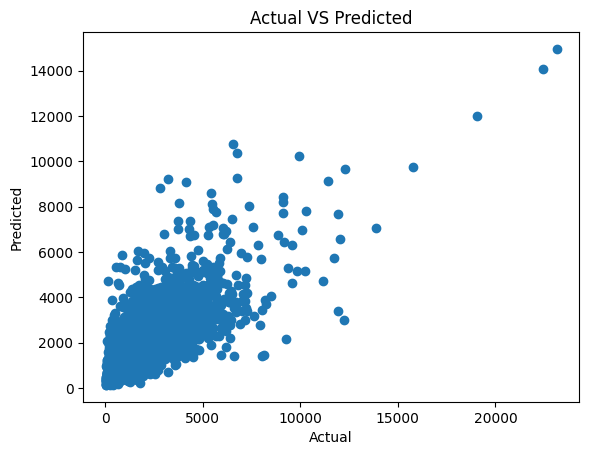

In [184]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")